In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Data Preprocessing
train_data = pd.read_csv('/Users/himeshagrawal/Summer analytics/Train_Data.csv')  # Replace 'train.csv' with the actual filename/path of your training dataset
test_data = pd.read_csv('/Users/himeshagrawal/Summer analytics/Test_Data.csv')  # Replace 'test.csv' with the actual filename/path of your testing dataset


In [7]:
train_data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [8]:
train_data['Food preference'].value_counts()

Food preference
DX6                     9639
DX5                     2167
DX2                     2128
DX4                     2099
DX3                     2072
DX1                     2063
DX1 DX2                  480
DX2 DX4                  476
DX3 DX4                  471
DX1 DX3                  461
DX4 DX5                  459
DX2 DX5                  459
DX2 DX3                  452
DX1 DX5                  450
DX3 DX5                  443
DX1 DX4                  437
DX1 DX2 DX5              116
DX1 DX3 DX4              113
DX1 DX2 DX3              110
DX1 DX2 DX4              110
DX3 DX4 DX5              109
DX2 DX3 DX5              105
DX1 DX3 DX5               98
DX2 DX4 DX5               98
DX2 DX3 DX4               90
DX1 DX4 DX5               89
DX1 DX3 DX4 DX5           27
DX2 DX3 DX4 DX5           26
DX1 DX2 DX4 DX5           23
DX1 DX2 DX3 DX4           20
DX1 DX2 DX3 DX5           16
DX1 DX2 DX3 DX4 DX5        4
Name: count, dtype: int64

In [9]:
Food = train_data['Food preference'].str.get_dummies(sep=' ')
Food.shape

(25920, 6)

In [10]:
numerical_features = train_data.drop('Food preference', axis=1)
train_data = pd.concat([numerical_features,Food], axis=1)

In [11]:
train_data.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,...,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,2408,44,2668,49,20.500470,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,0,1
1,25063,39,10363,20,26.076580,NO,URBAN,Stable,0.0,0.0,...,0.0,0.0,1.0,1,0,0,1,1,0,0
2,26798,29,132,1,21.420866,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,31907,27,10499,30,25.203247,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,26412,9,7963,40,19.355846,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1,0,0,0,0,0,1


In [12]:
train_data['Smoker?'] = train_data['Smoker?'].replace({'YES': 1, 'NO': 0 ,'Cannot say' : -1})

In [13]:
train_data['Living in?'] = train_data['Living in?'].replace({'URBAN': 1, 'RURAL': 0})

In [14]:
train_data = train_data.drop('Any heriditary condition?', axis=1)

In [15]:

for column in train_data.columns:
    train_data[column] = pd.to_numeric(train_data[column])  # Convert non-integer values to NaN
     # Drop rows with NaN values in the current column

In [16]:
test_data['Smoker?'] = test_data['Smoker?'].replace({'YES': 1, 'NO': 0,'Cannot say':-1})
test_data['Living in?'] = test_data['Living in?'].replace({'URBAN': 1, 'RURAL': 0})
test_data = test_data.drop('ID1', axis=1)
test_data = test_data.drop('ID2', axis=1)

In [17]:
test_data.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,2,DX6,38,18.879331,1,1,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,DX1,46,21.231991,0,1,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,37,DX4,11,17.867876,0,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44,DX5,10,26.886096,0,0,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,37,DX3 DX4,3,23.362746,0,0,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [18]:
train_data = train_data.drop('ID1', axis=1)
train_data = train_data.drop('ID2', axis=1)

In [19]:
train_data.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,44,49,20.500470,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
1,39,20,26.076580,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,1,0,0
2,29,1,21.420866,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,27,30,25.203247,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,9,40,19.355846,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1


In [20]:
test_data = test_data.drop('Any heriditary condition?', axis=1)
Food = test_data['Food preference'].str.get_dummies(sep=' ')
numerical_features = test_data.drop('Food preference', axis=1)
test_data = pd.concat([numerical_features,Food], axis=1)

In [22]:
test_data.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6
0,2,38,18.879331,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
1,5,46,21.231991,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0
2,37,11,17.867876,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0
3,44,10,26.886096,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0
4,37,3,23.362746,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,0


In [264]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data = train_data  # Replace 'train_data' with the actual filename/path of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Build the decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(train_features, train_labels)

# Make predictions on the testing set
predicted_labels = model.predict(test_features)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, predicted_labels)
print('Test Accuracy:', test_accuracy)


ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [266]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load and preprocess the dataset
data = train_data  # Replace with the actual filename/path of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Build the SVM model
model = SVC()

# Train the model
model.fit(train_features, train_labels)

# Evaluate the model
test_accuracy = model.score(test_features, test_labels)
print('Test Accuracy:', test_accuracy)

# Make predictions on the testing set
predictions = model.predict(test_features)


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load and preprocess the dataset
data = train_data  # Replace 'train_data' with the actual DataFrame containing your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=100)

# Train the model
knn.fit(train_features, train_labels)

# Evaluate the model
test_accuracy = knn.score(test_features, test_labels)
print('Test Accuracy:', test_accuracy)

# Make predictions on the testing set
predictions = knn.predict(test_features)


Test Accuracy: 0.7558706247230838


In [270]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

# Load and preprocess the dataset
data = train_data  # Replace 'train_data' with the actual DataFrame of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

scaler = RobustScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(train_features, train_labels)

# Make predictions on the testing set
predicted_labels = model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, predicted_labels)
print('Test Accuracy:', accuracy)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data = train_data  # Replace 'train_data' with the actual DataFrame of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_model.fit(train_features, train_labels)

# Make predictions with the Random Forest classifier
rf_predictions = rf_model.predict(test_features)

# Evaluate the Random Forest classifier
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print('Random Forest Accuracy:', rf_accuracy)

# Create a Bagging classifier using Random Forest as the base estimator
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                  n_estimators=10, random_state=42)

# Train the Bagging classifier
bagging_model.fit(train_features, train_labels)

# Make predictions with the Bagging classifier
bagging_predictions = bagging_model.predict(test_features)

# Evaluate the Bagging classifier
bagging_accuracy = accuracy_score(test_labels, bagging_predictions)
print('Bagging Accuracy:', bagging_accuracy)

# Create an AdaBoost classifier using Random Forest as the base estimator
adaboost_model = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                    n_estimators=10, random_state=42)

# Train the AdaBoost classifier
adaboost_model.fit(train_features, train_labels)

# Make predictions with the AdaBoost classifier
adaboost_predictions = adaboost_model.predict(test_features)

# Evaluate the AdaBoost classifier
adaboost_accuracy = accuracy_score(test_labels, adaboost_predictions)
print('AdaBoost Accuracy:', adaboost_accuracy)


Random Forest Accuracy: 0.8180475557524738
Bagging Accuracy: 0.8248412346773003
AdaBoost Accuracy: 0.8057893959533304


In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data = train_data  # Replace 'dataset.csv' with the actual filename/path of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Create a HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(learning_rate=0.03, max_iter=600, max_depth=5, min_samples_leaf=13,l2_regularization=0.15)

# Train the model
model.fit(train_features, train_labels)

# Make predictions on the testing set
predictions = model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print('Test Accuracy:', accuracy)

report = classification_report(test_labels, predictions)
print(report)

Test Accuracy: 0.8537808641975309
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       979
           1       0.87      0.90      0.88      1613

    accuracy                           0.85      2592
   macro avg       0.85      0.84      0.84      2592
weighted avg       0.85      0.85      0.85      2592



In [180]:
test_data.head()


,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6
0,2,38,18.879331,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
1,5,46,21.231991,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0
2,37,11,17.867876,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0
3,44,10,26.886096,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0
4,37,3,23.362746,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,0


In [185]:

for column in test_data.columns:
    test_data[column] = pd.to_numeric(test_data[column])  # Convert non-integer values to NaN
     # Drop rows with NaN values in the current column
test_data.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6
0,2,38,18.879331,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
1,5,46,21.231991,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0
2,37,11,17.867876,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0
3,44,10,26.886096,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0
4,37,3,23.362746,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,0


In [261]:
test_pred = scaler.transform(test_data)
test_predictions = model.predict(test_pred)

In [262]:
print(test_predictions)

[0 1 1 ... 1 0 0]


In [263]:
test_predictions = np.ravel(test_predictions)
test_predictions = pd.DataFrame({'predictions': test_predictions})
test_predictions.to_csv('sub10.csv',index=False)

In [188]:
test_predictions.shape

(6480, 1)

In [191]:
string_values = train_data.select_dtypes(include='object').melt()['value'].unique()
print(string_values)

[]


In [197]:
rows_with_missing_values = train_data[train_data.isnull().any(axis=1)]
rows_with_missing_values.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
39,36,47,27.557885,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
41,13,44,28.514937,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0
63,51,65,23.120156,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
82,32,34,26.531821,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
90,30,32,19.701808,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0


In [190]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data = train_data  # Replace 'train_data' with the actual DataFrame containing your training data

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Build the Gradient Boosting Classifier model
model = GradientBoostingClassifier()

# Train the model
model.fit(train_features, train_labels)

# Evaluate the model
test_predictions = model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print('Test Accuracy:', test_accuracy)

# Make predictions on the testing set
predictions = model.predict(test_features)

report = classification_report(test_labels, predictions)
print(report)

test_predictions = model.predict(test_data)

test_predictions = pd.DataFrame({'predictions': test_predictions})
test_predictions.to_csv('sub4.csv', index=False)

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [269]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Load and preprocess the dataset
data = train_data  # Replace 'dataset.csv' with the actual filename/path of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.1, random_state=42)

# Perform mean imputation
imputer = SimpleImputer(strategy='mean')
train_features_imputed = imputer.fit_transform(train_features)
test_features_imputed = imputer.transform(test_features)

# Train the logistic regression model
model = LogisticRegression()
model.fit(train_features_imputed, train_labels)

# Evaluate the model
train_accuracy = model.score(train_features_imputed, train_labels)
test_accuracy = model.score(test_features_imputed, test_labels)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)


Train Accuracy: 0.7271519204389575
Test Accuracy: 0.7330246913580247


/Users/himeshagrawal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [286]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data = train_data # Replace 'dataset.csv' with the actual filename/path of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Create a pipeline with the imputer and random forest classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42))
])

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)
accuracies = []

for train_index, test_index in kf.split(features):
    train_features, test_features = features.iloc[train_index], features.iloc[test_index]
    train_labels, test_labels = labels.iloc[train_index], labels.iloc[test_index]
    
    # Fit the pipeline on the training data
    pipeline.fit(train_features, train_labels)
    
    # Make predictions on the test fold
    test_predictions = pipeline.predict(test_features)
    
    # Evaluate the accuracy of the model on the test fold
    accuracy = accuracy_score(test_labels, test_predictions)
    accuracies.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracies) / k
print('Average Accuracy:', average_accuracy)
print(accuracies)


Average Accuracy: 0.8217592592592592
[0.8294753086419753, 0.8194444444444444, 0.8258101851851852, 0.8165509259259259, 0.8175154320987654]


In [288]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data = train_data  # Replace 'dataset.csv' with the actual filename/path of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Initialize the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=100, max_depth=10, random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)
accuracies = []

for train_index, test_index in kf.split(features):
    train_features, test_features = features.iloc[train_index], features.iloc[test_index]
    train_labels, test_labels = labels.iloc[train_index], labels.iloc[test_index]
    
    # Train the model
    model.fit(train_features, train_labels)
    
    # Make predictions on the test fold
    test_predictions = model.predict(test_features)
    
    # Evaluate the accuracy of the model on the test fold
    accuracy = accuracy_score(test_labels, test_predictions)
    report = classification_report(test_labels, test_predictions)
    print(report)
    accuracies.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracies) / k
print('Average Accuracy:', average_accuracy)
print(accuracies)


              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1903
           1       0.88      0.88      0.88      3281

    accuracy                           0.84      5184
   macro avg       0.83      0.83      0.83      5184
weighted avg       0.84      0.84      0.84      5184

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1891
           1       0.87      0.87      0.87      3293

    accuracy                           0.84      5184
   macro avg       0.83      0.83      0.83      5184
weighted avg       0.84      0.84      0.84      5184

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1961
           1       0.87      0.89      0.88      3223

    accuracy                           0.85      5184
   macro avg       0.84      0.83      0.83      5184
weighted avg       0.84      0.85      0.84      5184

              preci

Specific ailments: 0.07978395061728392
Age: 0.034355709876543204
BMI: 0.08923611111111109
Smoker?: 0.0704475308641975
Living in?: 0.023649691358024704
Follow Diet: 0.015489969135802473
Physical activity: 0.009471450617283928
Regular sleeping hours: 0.00841049382716048
Alcohol consumption: 0.021084104938271585
Social interaction: -0.0006751543209876698
Taking supplements: -1.9290123456816578e-05
Mental health management: -0.00011574074074074402
Illness count last year: 0.0015239197530864113
DX1: 0.006481481481481477
DX2: 0.0007137345679012252
DX3: 0.0023533950617283805
DX4: 0.005999228395061717
DX5: 0.015239197530864201
DX6: 0.06701388888888887


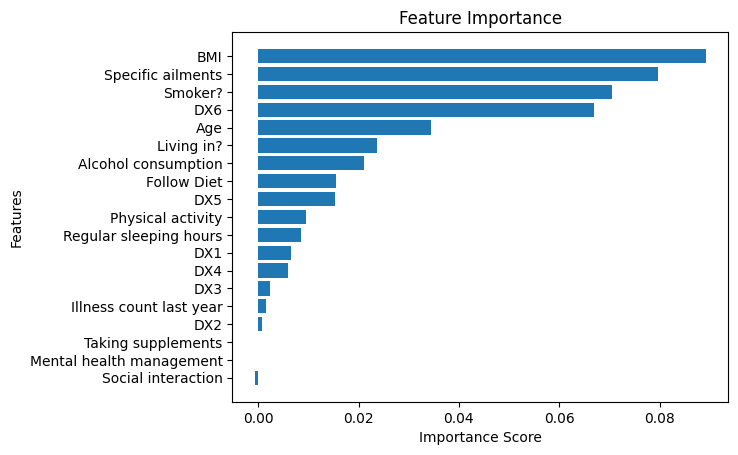

In [290]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = train_data # Replace 'dataset.csv' with the actual filename/path of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=100, max_depth=10, random_state=42)

# Train the model
model.fit(train_features, train_labels)

# Perform permutation importance
result = permutation_importance(model, test_features, test_labels, n_repeats=10, random_state=42)

# Get feature importance scores
feature_importance = result.importances_mean

# Print feature importance scores
for feature, importance in zip(features.columns, feature_importance):
    print(f'{feature}: {importance}')

# Visualize feature importance
sorted_idx = feature_importance.argsort()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features.columns[sorted_idx])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


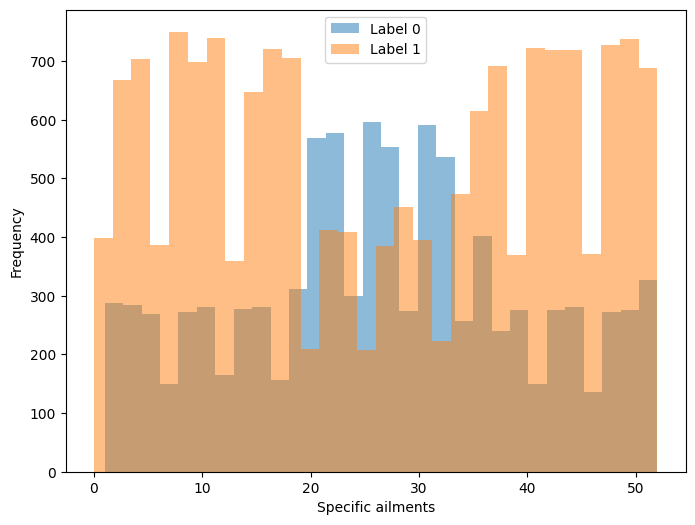

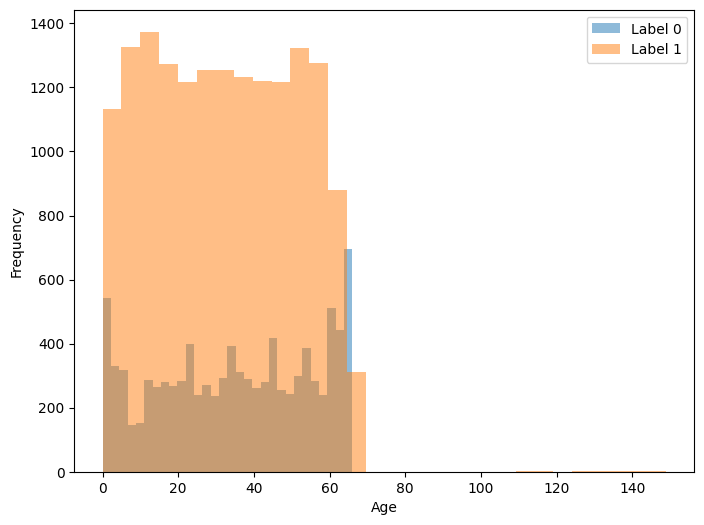

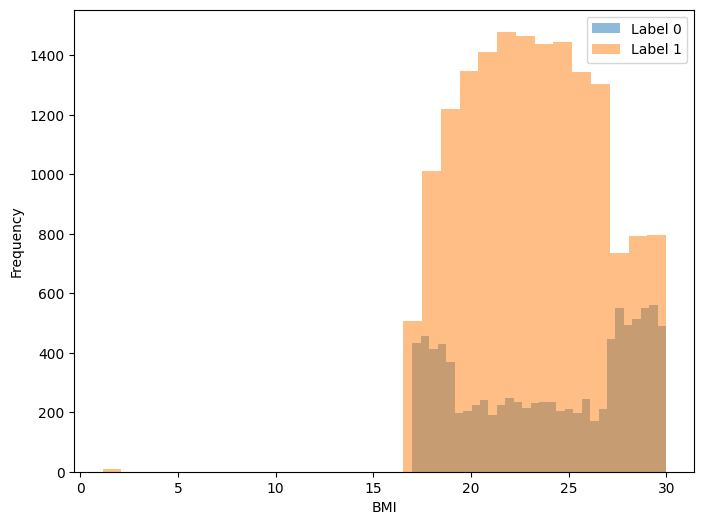

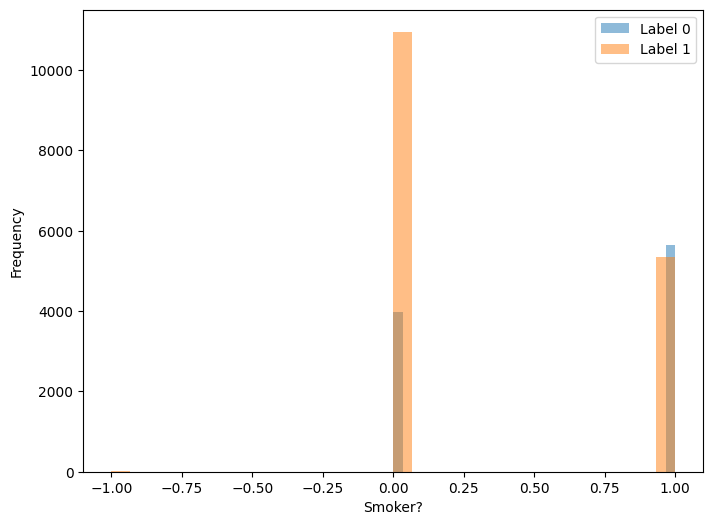

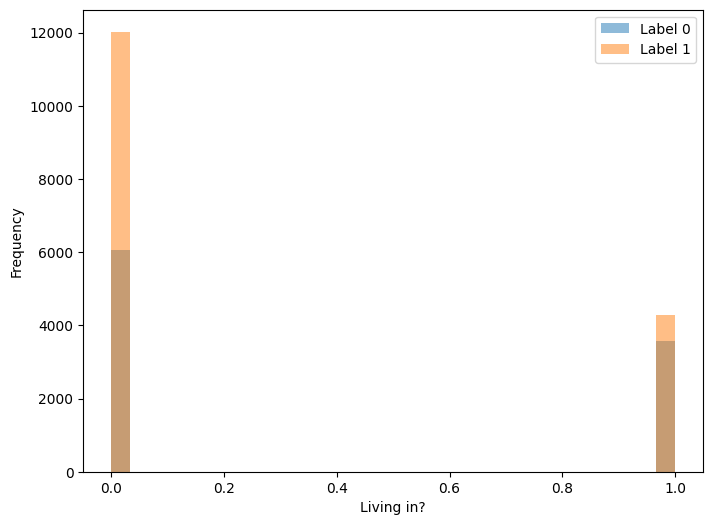

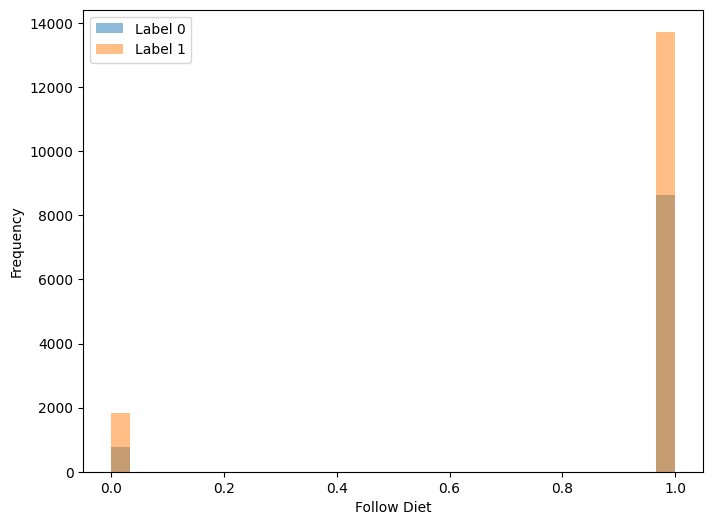

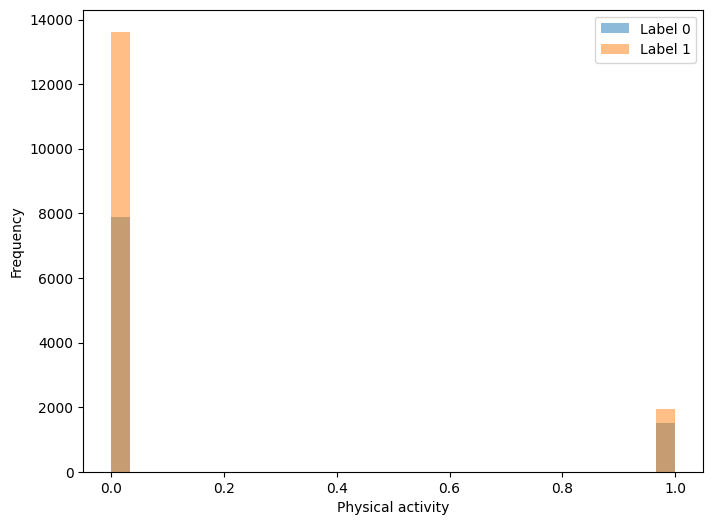

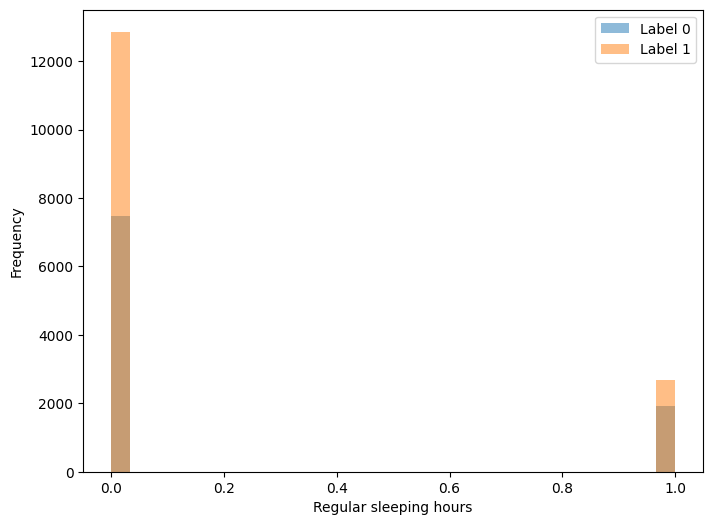

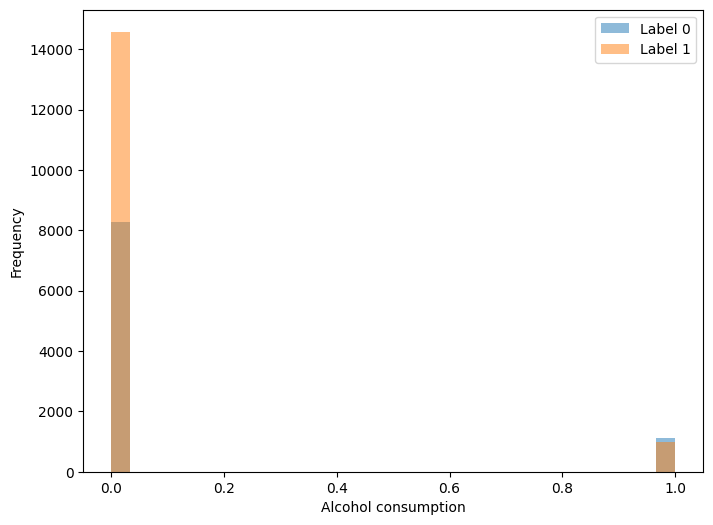

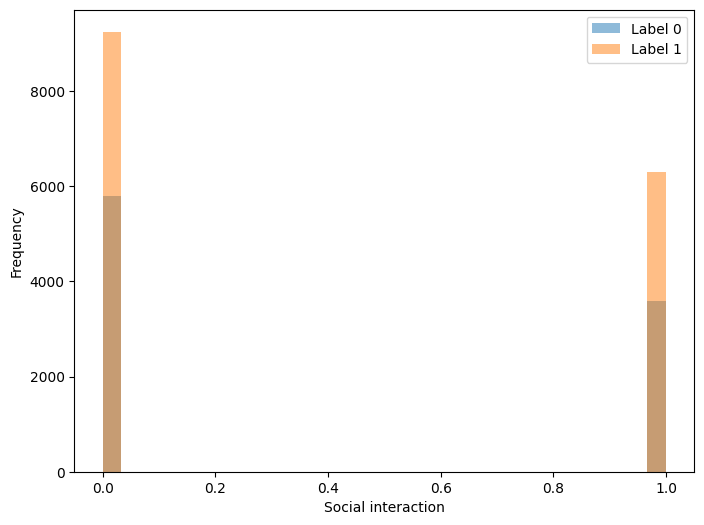

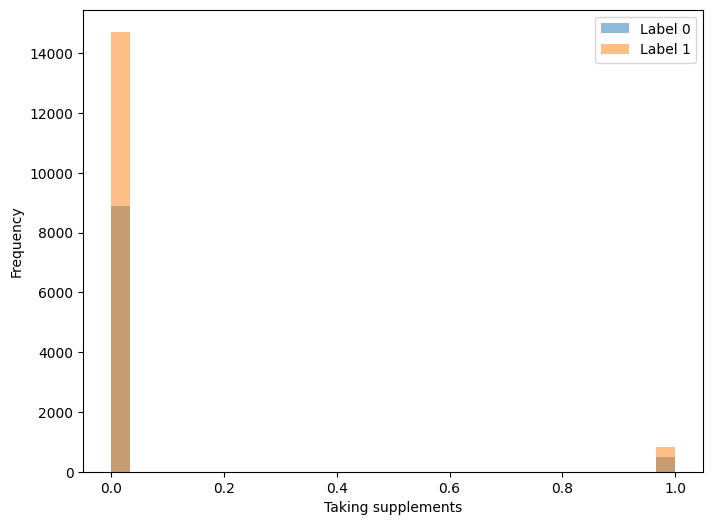

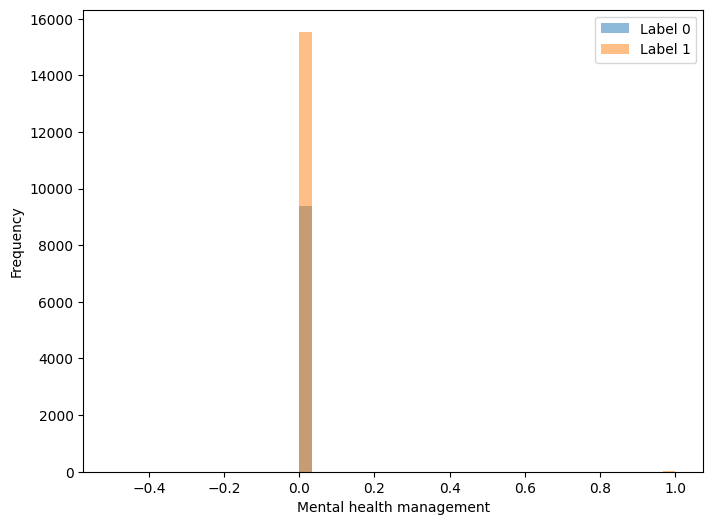

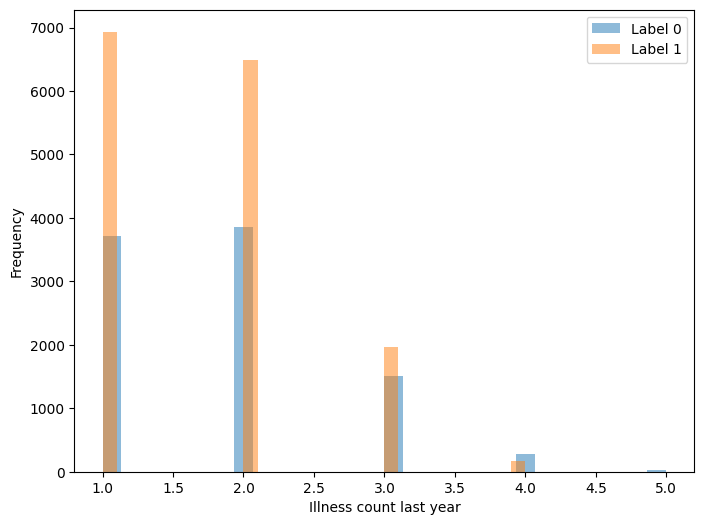

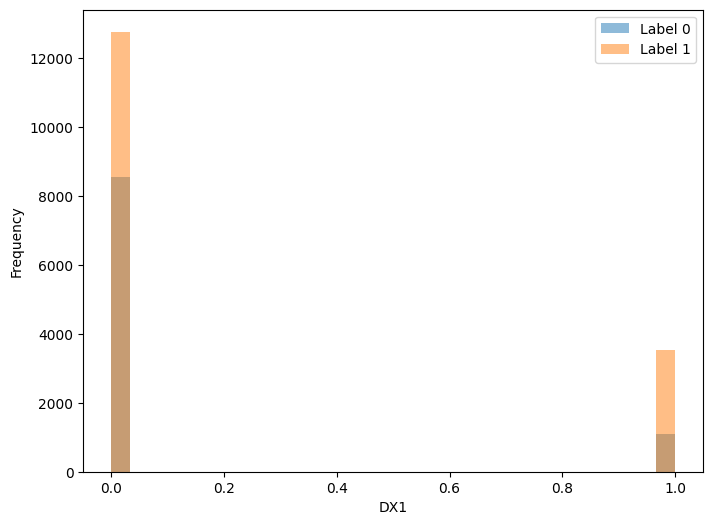

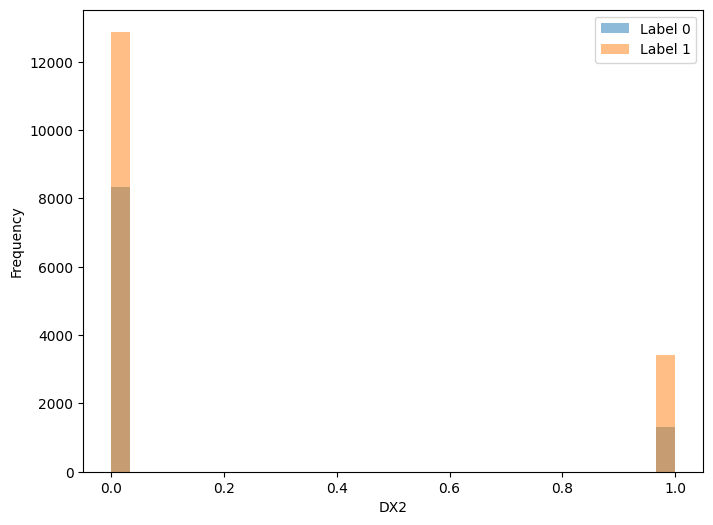

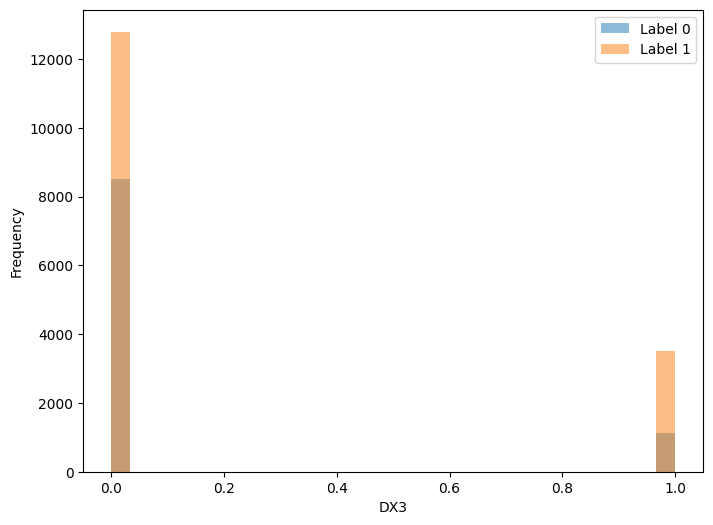

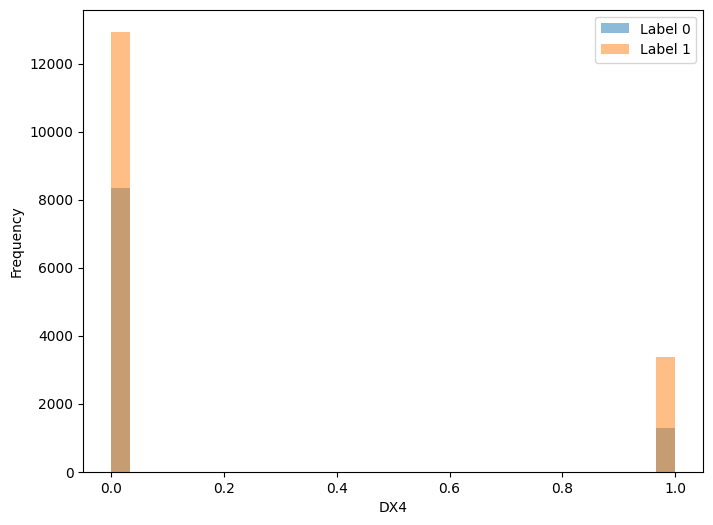

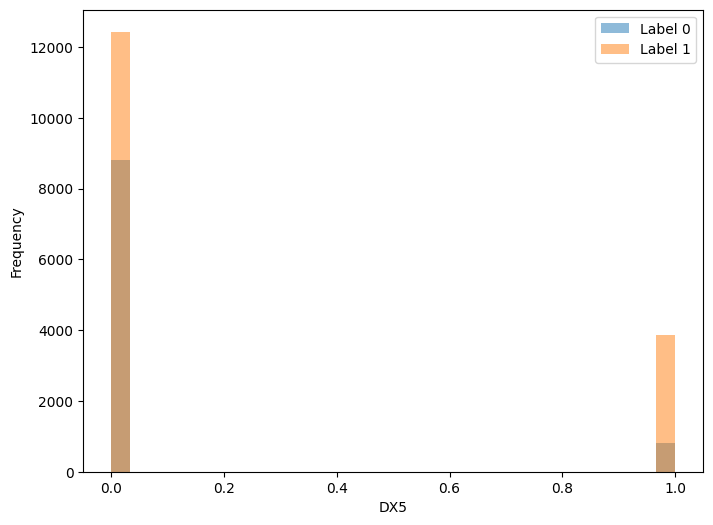

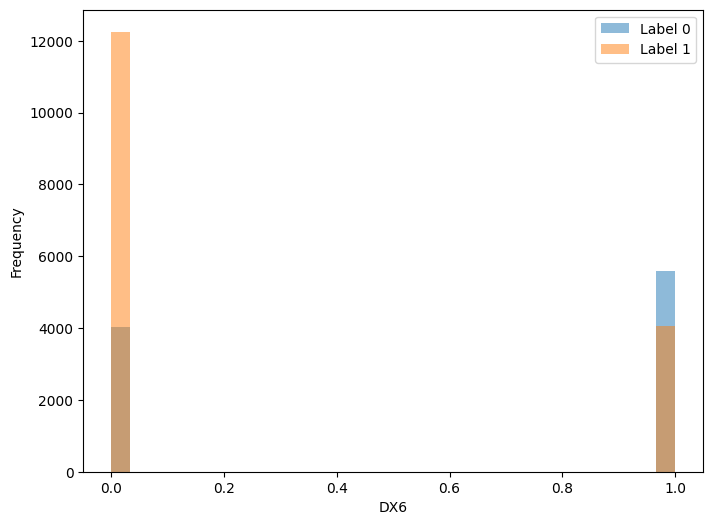

In [293]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = train_data # Replace 'dataset.csv' with the actual filename/path of your dataset

# Separate the features and the label
features = data.drop('Healthy', axis=1)
label = data['Healthy']

# Plot a graph for each feature against the label
for feature in features.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(features[labels == 0][feature], bins=30, alpha=0.5, label='Label 0')
    plt.hist(features[labels == 1][feature], bins=30, alpha=0.5, label='Label 1')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the dataset
data = train_data  # Replace 'dataset.csv' with the actual filename/path of your dataset

# Split the dataset into features and labels
features = data.drop('Healthy', axis=1)
labels = data['Healthy']

scaler = MinMaxScaler()
# Perform robust scaling on the features
scaled_features = scaler.fit_transform(train_features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='most_frequent')
train_features = imputer.fit_transform(train_features)
test_features = imputer.transform(test_features)


# Initialize the base estimators
rf = RandomForestClassifier(n_estimators=100, random_state=42)
hist_gb = HistGradientBoostingClassifier(max_iter=100, random_state=42)
xgb = XGBClassifier(random_state=42)

# Create the VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('rf', rf), ('hist_gb', hist_gb), ('xgb', xgb)],
    voting='hard'  # Use majority voting
)

# Fit the VotingClassifier on the training data
hist_gb.fit(train_features, train_labels)

# Make predictions on the testing set
test_predictions = hist_gb.predict(test_features)

# Evaluate the model's accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print('Test Accuracy:', test_accuracy)


Test Accuracy: 0.8433641975308642


In [42]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.ensemble import HistGradientBoostingClassifier
models['HistGradientBoosting'] = HistGradientBoostingClassifier()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(train_features,train_labels)
    
    # Make predictions
    predictions = models[key].predict(test_features)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, test_labels)
    precision[key] = precision_score(predictions, test_labels)
    recall[key] = recall_score(predictions, test_labels)

/Users/himeshagrawal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/himeshagrawal/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.736883,0.851874,0.760958
Support Vector Machines,0.537230,0.323987,0.854502
Decision Trees,0.779900,0.827492,0.825228
Random Forest,0.826003,0.871381,0.856244
Naive Bayes,0.515818,0.267601,0.891371
K-Nearest Neighbor,0.719522,0.792746,0.770667
HistGradientBoosting,0.845293,0.872600,0.881737


In [51]:
scaler = MinMaxScaler()
# Perform robust scaling on the features
test_data = scaler.fit_transform(test_data)
test_data = imputer.transform(test_data)
test_predictions = hist_gb.predict(test_data)
print(test_predictions)

[0 0 1 ... 0 1 0]


/Users/himeshagrawal/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [49]:
import numpy as np
test_predictions = np.ravel(test_predictions)
test_predictions = pd.DataFrame({'predictions': test_predictions})
test_predictions.to_csv('sub14.csv',index=False)